<a href="https://colab.research.google.com/github/yun890503/Prediction-of-quality-of-Wine/blob/main/%E6%A8%A1%E5%9E%8B%E5%84%AA%E5%8C%96%E8%88%87%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulpha

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

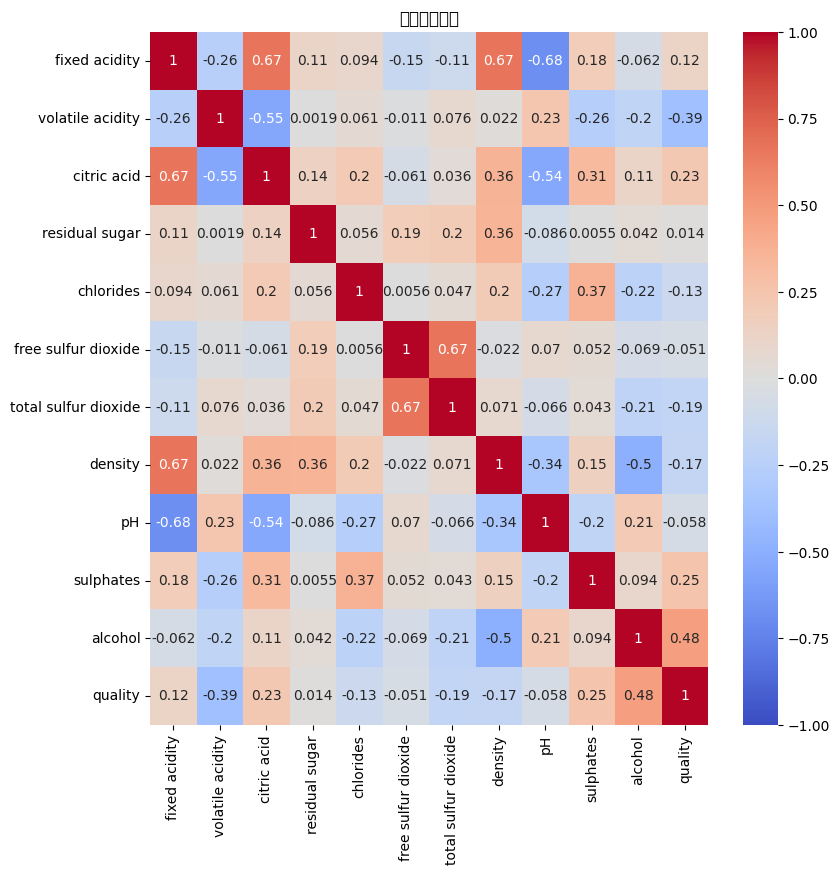

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


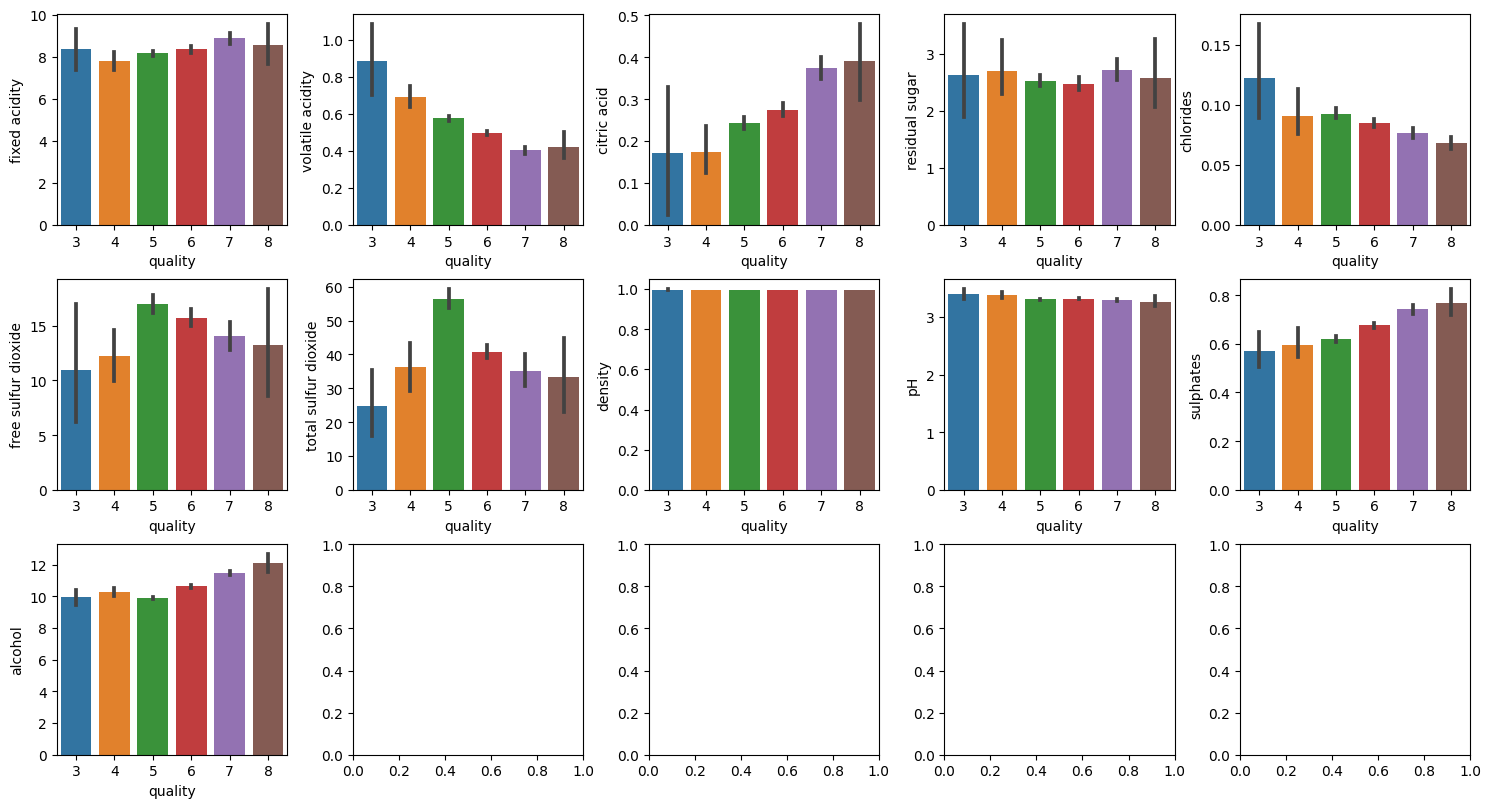

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00             1.9   0.106845   
1          0.283186          0.520548         0.00             2.6   0.143573   
2          0.283186          0.438356         0.04             2.3   0.133556   
3          0.584071          0.109589         0.56             1.9   0.105175   
4          0.247788          0.397260         0.00             1.9   0.106845   
...             ...               ...          ...             ...        ...   
1594       0.141593          0.328767         0.08             2.0   0.130217   
1595       0.115044          0.294521         0.10             2.2   0.083472   
1596       0.150442          0.267123         0.13             2.3   0.106845   
1597       0.115044          0.359589         0.12             2.0   0.105175   
1598       0.123894          0.130137         0.47             3.6   0.091820   

      free sulfur dioxide  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

最佳超參數: {'C': 10, 'max_iter': 1000, 'solver': 'sag'}
最佳得分: 0.8693025078369907


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
from tables.table import Column
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

wine=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
wine.head()
wine.describe()
wine.info()
for column in wine.columns:
  print(column)
# 比較每個特徵間的關聯程度
correlation_matrix=wine.corr()
print(correlation_matrix)
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('相關性熱力圖')
plt.show()
# 找出高度正相關的特徵們

print(wine.corr()['quality'].abs().sort_values())
# 取前四個影響力大的分別是(影響力>0.2)
# 1. alcohol
# 2. volatile acidity
# 3. sulphates
# 4. citric acid


fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 8))
ax = ax.flatten()
index=0
for i in wine.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=wine, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()


# 特徵工程
# 刪除 free sulfur dioxide、residual sugar、density、PH 欄位
clean_df = wine.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis =1)
clean_df



# 特徵標準化(Standardize)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_columns = clean_df.columns.difference(["quality"])
# clean_df[feature_columns] = scaler.fit_transform(clean_df[feature_columns])
# print(wine)
# Min-Max Normalization（最小-最大標準化）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = clean_df.columns.difference(["quality"])
wine[feature_columns] = scaler.fit_transform(wine[feature_columns])
print(wine)




from sklearn.model_selection import train_test_split

# 將 'quality' 欄位的值轉換為二元分類（1代表優質酒，0代表非優質酒）
wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

# split X,y & train, test
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('請嘗試使用 scikit-learn 中「不同基本分類模型」，並且進行比較結果？')
# 建模&交叉驗證
logistic_model = LogisticRegression(random_state=0, max_iter=3000)
# 训练模型
logistic_model.fit(X_train, y_train)

# 预测并评估模型性能
y_pred = logistic_model.predict(X_test)

# 交叉验证并计算平均得分
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("Cross-validation Scores:", scores)
print("logistic_model_Average Score:", np.mean(scores))

# 建立随机森林模型
rfc = RandomForestClassifier(n_estimators=200)

# 交叉验证并计算平均得分
scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("RandomForestCross-validation Scores:", scores)
print("RandomForestAverage Score:", np.mean(scores))


# 建立逻辑回归模型（带交叉验证）
from sklearn.linear_model import LogisticRegressionCV
logistic_model_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=3000)

# 交叉验证并计算平均得分
scores = cross_val_score(logistic_model_cv, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("LogisticRegressionCV Cross-validation Scores:", scores)
print("LogisticRegressionCV Average Score:", np.mean(scores))

# 建立高斯朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# 交叉验证并计算平均得分
scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("GaussianNaiveBayes Cross-validation Scores:", scores)
print("GaussianNaiveBayes Average Score:", np.mean(scores))

# 建立支持向量机模型
from sklearn.svm import SVC
svc = SVC(kernel='linear')

# 交叉验证并计算平均得分
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("Support Vector Classifier Cross-validation Scores:", scores)
print("Support Vector Classifier Average Score:", np.mean(scores))

# 建立决策树模型
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# 交叉验证并计算平均得分
scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("Decision Tree Cross-validation Scores:", scores)
print("Decision Tree Average Score:", np.mean(scores))

# 建立 KNN 模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# 交叉验证并计算平均得分
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# 输出每次交叉验证的得分和平均得分
print("K-Nearest Neighbors Cross-validation Scores:", scores)
print("K-Nearest Neighbors Average Score:", np.mean(scores))

print('-------------------------------------------------------------------')


wine1=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
# split X,y & train, test
clean_df1 = wine1.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis =1)
# Min-Max Normalization（最小-最大標準化）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = clean_df1.columns.difference(["quality"])
wine1[feature_columns] = scaler.fit_transform(wine1[feature_columns])
print(wine1)
from sklearn.model_selection import train_test_split

# 將 'quality' 欄位的值轉換為二元分類（1代表優質酒，0代表非優質酒）
wine1['quality'] = wine1['quality'].apply(lambda x: 1 if x >= 7 else 0)

# split X,y & train, test
X = wine1.drop('quality', axis = 1)
y = wine1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 設置超參數範圍
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 300, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# 建立邏輯回歸模型
logistic_model = LogisticRegression()

# 使用 GridSearchCV 進行超參數搜索
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# 輸出最佳超參數和得分
print("最佳超參數:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)
# 最佳超參數: {'C': 10, 'max_iter': 1000, 'solver': 'sag'}
# 最佳得分: 0.8693025078369907

